# Panfilov M.D. BSBO-07-20

In [8]:
!pip install networkx
!pip install scikit-fuzzy

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# переменные для задачи - автомобиль (engine_power, weight, dimensions)
engine_power = ctrl.Antecedent(np.arange(0, 1400, 50), 'engine_power') # мощность двигателя в кубиках
weight = ctrl.Antecedent(np.arange(150, 350, 10), 'weight')
dimensions = ctrl.Consequent(np.arange(150, 300, 10), 'dimensions') # в см


# используем стандартную функцию принадлежности (треугольник)
dimensions.automf(names=['small', 'medium', 'high'])



engine_power['small'] = fuzz.trapmf(engine_power.universe, [0, 0, 150, 350])
engine_power['medium'] = fuzz.trapmf(engine_power.universe, [300, 400, 800, 1000])
engine_power['high'] = fuzz.trapmf(engine_power.universe, [700, 900, 1200, 1400])

weight['low'] = fuzz.trapmf(weight.universe, [150, 150, 180, 200])
weight['high'] = fuzz.trapmf(weight.universe,[180, 200, 250, 350]) 

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


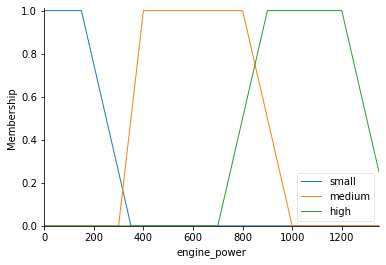

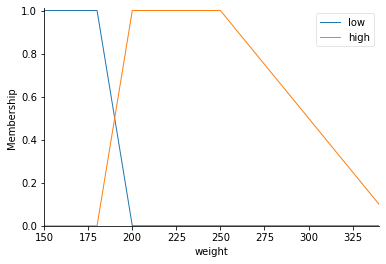

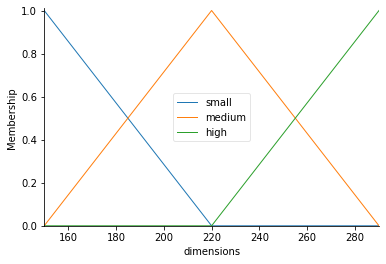

In [6]:
engine_power.view()
weight.view()
dimensions.view()

In [11]:
# база правил
rule1 = ctrl.Rule(engine_power['small'] & weight['low'], dimensions['small'])
rule2 = ctrl.Rule(engine_power['small'] & weight['high'], dimensions['small'])
rule3 = ctrl.Rule(engine_power['medium'] & weight['low'], dimensions['high'])
rule4 = ctrl.Rule(engine_power['medium'] & weight['high'], dimensions['medium'])
rule5 = ctrl.Rule(engine_power['high'] & weight['low'], dimensions['high'])
rule6 = ctrl.Rule(engine_power['high'] & weight['high'], dimensions['high'])

In [12]:
dimensions_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
dimensions_simulator= ctrl.ControlSystemSimulation(dimensions_ctrl)

#
dimensions_simulator.input['engine_power'] = 800
dimensions_simulator.input['weight'] = 190

#
dimensions_simulator.compute()
print(dimensions_simulator.output['dimensions'])

228.33333333333331


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


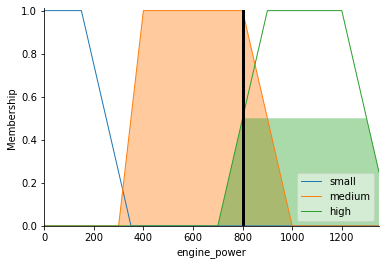

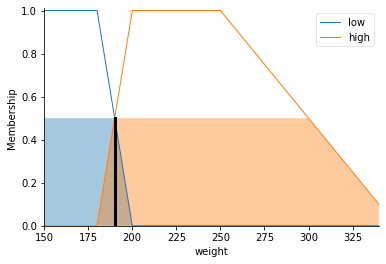

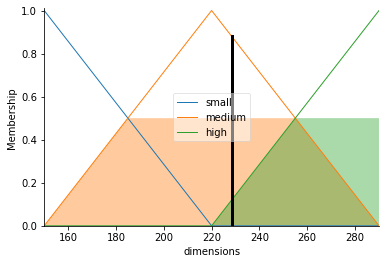

In [13]:
engine_power.view(sim=dimensions_simulator)
weight.view(sim=dimensions_simulator)
dimensions.view(sim=dimensions_simulator)